# Building a GBM model

We are going to read in the data and build a GBM model. <br>XGBoost is a popular package in Python for building GBMs. To learn more about xgboost you can attend our training session later today, in the meantime have a read here: http://xgboost.readthedocs.io/en/latest/model.html


In [58]:
# Load the libraries and setting neccessary.
import pandas as pd
import matplotlib
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# Set the path to the location where you have downloaded the data
data_location = ##***location of data***

In [60]:
# Read in the data set
file_name = 'competition_starter.csv'
starter_data = pd.read_csv(data_location + file_name, header=0, index_col=0)

In [112]:
# Take a look at the top 5 records in the data
starter_data.head()

,gp_practice,gp_year,gp_month,quality,eastings,northings,country,nhs_ha,longitude,latitude,...,lt_learning_diff_pct,ltn_emotional_mental_health_condition_pct,lt_long_term_pain_discomfort_pct,lt_shortness_of_breath_diffbreathing_pct,lt_confusion_memory_loss_pct,lt_chronic_illness_pct,lt_other_condition_pct,lt_no_condition_pct,hsc_trust,gp_cost_per_registered_patient
0,900207,2014,1,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,1.74,6.67,10.55,10.01,1.78,6.64,4.86,68.88,Belfast,15.290104
1,900207,2014,2,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,1.74,6.67,10.55,10.01,1.78,6.64,4.86,68.88,Belfast,11.646997
2,900207,2014,3,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,1.74,6.67,10.55,10.01,1.78,6.64,4.86,68.88,Belfast,13.544038
3,900207,2014,4,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,1.74,6.67,10.55,10.01,1.78,6.64,4.86,68.88,Belfast,13.724001
4,900207,2014,5,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,1.74,6.67,10.55,10.01,1.78,6.64,4.86,68.88,Belfast,14.169956


## Merge on Employment data

In [62]:
# First, read in the csv
file_name_employment = 'competition_employment.csv'
employment_data = pd.read_csv(data_location + file_name_employment, header=0)
employment_data.head()

,soa,all_16_74,part_time_16_74,full_time_16_74,self_employed_16_74,unemployed_16_74,full_student_16_74,retired_16_74,student_16_74,home_16_74,...,retired_16_74_pct,student_16_74_pct,home_16_74_pct,sick_or_disability_16_74_pct,other_16_74_pct,voluntary_16_74_pct,unemployed_16_24_pct,umemployed_50_74_pct,never_worked_16_74_pct,long_term_unemployed_16_74_pct
0,Aghanloo 1,1724.0,240.0,663.0,133.0,106.0,71.0,145.0,128.0,88.0,...,8.41,7.42,5.10,6.44,2.26,12.82,31.13,9.43,19.81,42.45
1,Andersonstown 2,1087.0,156.0,309.0,50.0,60.0,42.0,172.0,66.0,42.0,...,15.82,6.07,3.86,13.52,3.96,12.33,28.33,21.67,6.67,53.33
2,Annagh 1,1150.0,166.0,504.0,108.0,35.0,30.0,135.0,58.0,38.0,...,11.74,5.04,3.30,4.43,2.17,14.52,31.43,14.29,11.43,45.71
3,Annalong 2,1115.0,147.0,373.0,129.0,58.0,20.0,145.0,53.0,60.0,...,13.00,4.75,5.38,8.61,3.05,15.87,31.03,20.69,13.79,43.10
4,Ardeevin,2537.0,324.0,1142.0,231.0,53.0,69.0,410.0,105.0,80.0,...,16.16,4.14,3.15,2.80,2.05,18.96,30.19,18.87,5.66,39.62


In [63]:
## Check which column is common to both the starter_data and employment_data
common_column_name = employment_data.columns[[c in starter_data.columns for c in employment_data.columns]]
print(common_column_name.values)

['soa']


In [64]:
# Perform the merge
common_key = 'soa'

hack_data = starter_data.merge(employment_data, on=common_key, how='left')

In [65]:
hack_data.head()

,gp_practice,gp_year,gp_month,quality,eastings,northings,country,nhs_ha,longitude,latitude,...,retired_16_74_pct,student_16_74_pct,home_16_74_pct,sick_or_disability_16_74_pct,other_16_74_pct,voluntary_16_74_pct,unemployed_16_24_pct,umemployed_50_74_pct,never_worked_16_74_pct,long_term_unemployed_16_74_pct
0,900207,2014,1,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,9.76,3.13,3.89,7.16,2.74,15.48,25.24,9.71,18.45,30.1
1,900207,2014,2,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,9.76,3.13,3.89,7.16,2.74,15.48,25.24,9.71,18.45,30.1
2,900207,2014,3,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,9.76,3.13,3.89,7.16,2.74,15.48,25.24,9.71,18.45,30.1
3,900207,2014,4,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,9.76,3.13,3.89,7.16,2.74,15.48,25.24,9.71,18.45,30.1
4,900207,2014,5,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.59872,...,9.76,3.13,3.89,7.16,2.74,15.48,25.24,9.71,18.45,30.1


## Dealing with Categorical variables

Categorical variables need to be dealt with specially for Python's XGBoost module. 
<br>We're going to do One Hot Encoding on 'primary_care_trust'

In [72]:
# primary_care_trust contains 5 unique values in the data
hack_data['primary_care_trust'].unique()

array(['Belfast', 'South Eastern', 'Northern', 'Southern', 'Western'], dtype=object)

In [73]:
# Take a look at this column in the dataset 
hack_data['primary_care_trust'][1840:1850]

1840          Belfast
1841          Belfast
1842          Belfast
1843          Belfast
1844          Belfast
1845    South Eastern
1846    South Eastern
1847    South Eastern
1848    South Eastern
1849    South Eastern
Name: primary_care_trust, dtype: object

In [74]:
# Use pandas get_dummies function to One Hot Encode

# Compare with the same records shown above
# The function creates columns for each of the unique values
# If the record's value is 'Belfast', the Belfast column has value 1.0 and the rest are 0.0

primary_care_trust = pd.get_dummies(hack_data['primary_care_trust'])
primary_care_trust[1840:1850]

,Belfast,Northern,South Eastern,Southern,Western
1840,1.0,0.0,0.0,0.0,0.0
1841,1.0,0.0,0.0,0.0,0.0
1842,1.0,0.0,0.0,0.0,0.0
1843,1.0,0.0,0.0,0.0,0.0
1844,1.0,0.0,0.0,0.0,0.0
1845,0.0,0.0,1.0,0.0,0.0
1846,0.0,0.0,1.0,0.0,0.0
1847,0.0,0.0,1.0,0.0,0.0
1848,0.0,0.0,1.0,0.0,0.0
1849,0.0,0.0,1.0,0.0,0.0


In [75]:
# Join the encoded columns back on to the data
hack_data.join(primary_care_trust)

,gp_practice,gp_year,gp_month,quality,eastings,northings,country,nhs_ha,longitude,latitude,...,voluntary_16_74_pct,unemployed_16_24_pct,umemployed_50_74_pct,never_worked_16_74_pct,long_term_unemployed_16_74_pct,Belfast,Northern,South Eastern,Southern,Western
0,900207,2014,1,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
1,900207,2014,2,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
2,900207,2014,3,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
3,900207,2014,4,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
4,900207,2014,5,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
5,900207,2014,6,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
6,900207,2014,7,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
7,900207,2014,8,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
8,900207,2014,9,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0
9,900207,2014,10,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,54.598720,...,15.48,25.24,9.71,18.45,30.10,1.0,0.0,0.0,0.0,0.0


## Train/Test Split

For machine learning problems, it's common to split your data into a train and a test set - this helps with overfitting. Find out more about overfitting in the later GBM talk.

In [80]:
# If the gp_practice is divisible by 5, it becomes part of our test data. If not, it's our train data.

split_filter = hack_data['gp_practice'] %5 == 0

train = hack_data[~split_filter]
test = hack_data[split_filter]

In [81]:
# Lets check the size of our two data sets

print("Train:", train.shape)
print("Test:", test.shape)

Train: (7165, 148)
Test: (2128, 148)


We now need to choose which variables we want to consider in our model. Let's look at the complete list.

In [21]:
for c in train.columns:
    print(c)

gp_practice
gp_year
gp_month
practicename
address1
address2
address3
postcode
quality
eastings
northings
country
nhs_ha
longitude
latitude
parliamentary_constituency
european_electoral_region
primary_care_trust
incode
outcode
admin_district
admin_ward
ccg
nuts
multiple_dep_measure_rank
income_score
income_rank
empl_score_18-59_64_yrs
empl_rank_18-59_64_yrs
health_dep_disability_rank
education_skills_train_rank
proximity_to_services_rank
living_env_rank
crime_disorder_rank
income_dep_children_score
income_dep_children_rank
income_dep_older_people_score
income_dep_older_people_rank
edu_skill_train_primary_sub_rank
edu_skill_train_post-primary_sub_rank
edu_skill_train_work_age_adult_sub_rank
living_env_housing_quality_sub_rank
living_env_housing_access_sub_rank
living_env_outdoor_phys_env_sub_rank
crime_disorder_crime_sub_rank
crime_disorder_disorder_sub_rank
population_estimate_nimdm_2010
all_residents
age_0_4_years
age_5_9_years
age_10_14_years
age_15_19_years
age_20_24_years
age_25_29_

We now set up our training and testing matrices for the GBM, this is where we select the variables we want in the model

In [82]:
# Let's choose 3 variables that look like they might be predictive of registered patient costs

features = ['health_dep_disability_rank', 'all_residents', 'sick_or_disability_16_74']

In [83]:
# First - prepare the XGBoost DMatrix for the training data

data = train[features] # feature variables
label = train['gp_cost_per_registered_patient']  # target variable

dtrain = xgb.DMatrix(data, label=label)

data.head()

,health_dep_disability_rank,all_residents,sick_or_disability_16_74
0,209.0,2757.0,149.0
1,209.0,2757.0,149.0
2,209.0,2757.0,149.0
3,209.0,2757.0,149.0
4,209.0,2757.0,149.0


In [24]:
# Second - prepare the XGBoost DMatrix for the test data

data_test = test[features] # feature variables
label_test = test['gp_cost_per_registered_patient']  # target variable

dtest = xgb.DMatrix(data_test, label=label_test)

data_test.head()

,health_dep_disability_rank,all_residents,sick_or_disability_16_74
82,51.0,2864.0,299.0
83,51.0,2864.0,299.0
84,51.0,2864.0,299.0
85,51.0,2864.0,299.0
86,51.0,2864.0,299.0


In [25]:
# Setting up parameters for model build

param = {'max_depth': 5 ,
         'eta': 0.5, 
         'silent': 1, 
         'objective': 'reg:linear', 
         'grow_policy':'lossguide',
         'nthread': 4,
         'eval_metric': 'mae',
         'seed': 123,
        }

plst = param.items()

# We're going to train on dtrain and evaluate on dtest
evallist = [(dtest, 'eval'), (dtrain, 'train')]

## Now we train the model

In [26]:
num_round = 1000
model = xgb.train(plst, dtrain, num_round, evallist, early_stopping_rounds=50)

[0]	eval-mae:8.58495	train-mae:8.08342
Multiple eval metrics have been passed: 'train-mae' will be used for early stopping.

Will train until train-mae hasn't improved in 50 rounds.
[1]	eval-mae:4.60973	train-mae:4.1511
[2]	eval-mae:3.00701	train-mae:2.44258
[3]	eval-mae:2.48004	train-mae:1.82519
[4]	eval-mae:2.27275	train-mae:1.63722
[5]	eval-mae:2.15986	train-mae:1.52479
[6]	eval-mae:2.16836	train-mae:1.46937
[7]	eval-mae:2.15	train-mae:1.44897
[8]	eval-mae:2.13359	train-mae:1.42528
[9]	eval-mae:2.16635	train-mae:1.40371
[10]	eval-mae:2.18408	train-mae:1.38775
[11]	eval-mae:2.20022	train-mae:1.37476
[12]	eval-mae:2.19735	train-mae:1.36419
[13]	eval-mae:2.20622	train-mae:1.35604
[14]	eval-mae:2.20207	train-mae:1.35084
[15]	eval-mae:2.19826	train-mae:1.34767
[16]	eval-mae:2.19745	train-mae:1.34509
[17]	eval-mae:2.20067	train-mae:1.34283
[18]	eval-mae:2.20857	train-mae:1.34226
[19]	eval-mae:2.21172	train-mae:1.34192
[20]	eval-mae:2.21319	train-mae:1.34163
[21]	eval-mae:2.21807	train-mae

## Evaluating our GBM

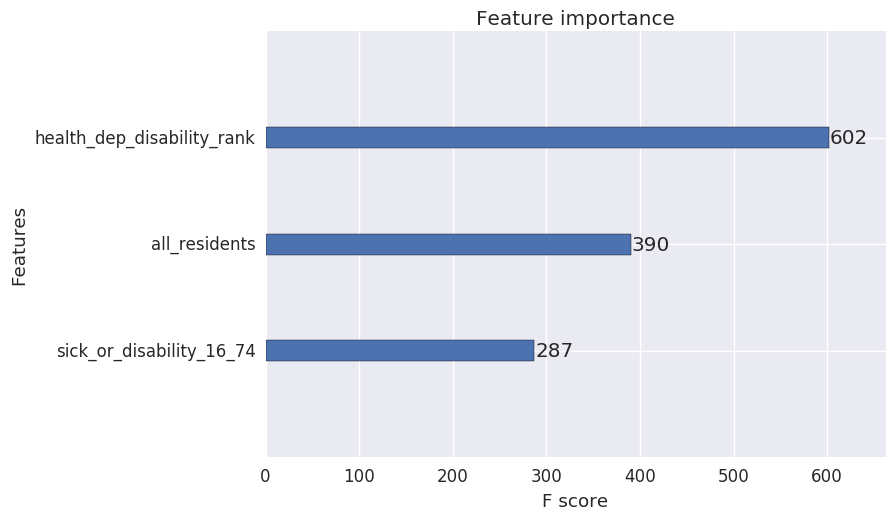

In [92]:
# Examine the relative importance of each variable in the model

sns.set(font_scale = 1.2)
xgb.plot_importance(model)

plt.show()

In [88]:
# Score the model on the testing data
ypred = model.predict(dtest)

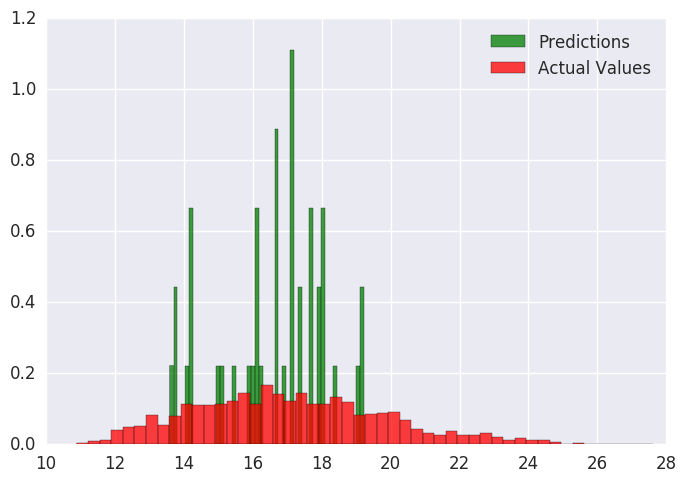

In [95]:
# Compare the distribution of predictions to that of the actual values

plt.hist(ypred, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(label_test, 50, normed=1, facecolor='red', alpha=0.75)

plt.legend(['Predictions','Actual Values'])

plt.show()

## Calculate Accuracy Metric: Mean Squared Error

Mean Squared Error, or MSE, is the accuracy metric for the competition. You can calculate it for your test data

In [96]:
def mse(actual, predicted):
    '''
    This is a python function that takes the actual and predicted values
    and returns the mean squared error
    '''
    error = sum((actual - predicted)**2)
    return error

In [98]:
# Call the mse function
mse(label_test, ypred)

14271.377440355402

## Use your model to make predictions for the competition data

holdout.csv contains the features, but without the target variable, gp_cost_per_registered_patient

In [99]:
validation_file_name = 'holdout.csv'

validation_data = pd.read_csv(data_location + validation_file_name, header=0, index_col=0)

validation_data.head()

,record_id,gp_practice,gp_year,gp_month,quality,eastings,northings,country,nhs_ha,longitude,...,palliative_medicine,plastic_surgery,radiology,rehabilitation,restorative_dentistry,rheumatology,t_o_surgery,thoracic_medicine,thoracic_surgery,urology
0,0,900207,2017,6,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,...,13.0,100.0,0.0,48.0,1878.0,3241.0,23798.0,1733.0,55.0,3924.0
1,1,900207,2017,7,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,900207,2017,8,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,900209,2017,6,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,...,13.0,100.0,0.0,48.0,1878.0,3241.0,23798.0,1733.0,55.0,3924.0
4,4,900209,2017,7,1,336515,374326,Northern Ireland,Health & Social Care Board,-5.888459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Prepare the XGBoost DMatrix for the validation/holdout data

record_id = validation_data['record_id'].values
unlabelled_data = validation_data[features]

dvalidate = xgb.DMatrix(unlabelled_data)


# Use the model the make predictions
competition_pred = model.predict(dvalidate)

In [102]:
# Take a look at the first 10 predictions
# Are the values sensible?
competition_pred[:10]

array([ 16.71607018,  16.71607018,  16.71607018,  16.71607018,
        16.71607018,  16.71607018,  17.6489315 ,  17.6489315 ,
        17.6489315 ,  11.93797398], dtype=float32)

In [109]:
mean_cost = starter_data['gp_cost_per_registered_patient'].mean()

print("The mean of gp_cost_per_registered_patient for the starter data was %.2f" %mean_cost)

The mean of gp_cost_per_registered_patient for the starter data was 16.68


## Preparing your predictions for submission

In [110]:
# The submission format is a csv file containing 2 columns: record_id and your prediction

In [111]:
competition_entry = pd.DataFrame({'record_id':record_id, 'prediction':competition_pred})
competition_entry = competition_entry[['record_id','prediction']]
competition_entry.head(15)

,record_id,prediction
0,0,16.716070
1,1,16.716070
2,2,16.716070
3,3,16.716070
4,4,16.716070
5,5,16.716070
6,6,17.648932
7,7,17.648932
8,8,17.648932
9,9,11.937974


In [49]:
## Save out the competition entry predictions
competition_entry.to_csv(data_location + 'comp_entry.csv', header=True, index=False)

## Upload to Kaggle and check your position on the leaderboard!!